### import libaries

In [156]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
#pip install gensim
from gensim import corpora, models
#nltk.download('stopwords')
#pip install wordcloud
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
#pip install advertools
import advertools as adv
from pprint import pprint
#pip install pyldavis
import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt

### load datasets 

In [162]:
file_path = "/Users/khevnaparikh/Desktop/Text as Data/Final Project/Twitter Data/"

In [163]:
# 'U1': 'Kyiv, Ukraine',
# 'U2': 'Kharkiv, Ukraine',
# 'U3': 'Odesa, Ukraine',
def load_data_Ukraine(filepath): 
    U1prewar = pd.read_csv(filepath+"U1prewar.csv")
    U1postwar = pd.read_csv(filepath+"U1postwar.csv")
    U2prewar = pd.read_csv(filepath+"U2prewar.csv")
    U2postwar = pd.read_csv(filepath+"U2postwar.csv")
    U3prewar = pd.read_csv(filepath+"U3prewar.csv")
    U3postwar = pd.read_csv(filepath+"U3postwar.csv")
    
    return U1prewar, U1postwar, U2prewar, U2postwar, U3prewar, U3postwar


# 'R1': 'Moscow, Russia',
# 'R2': 'St. Petersburg, Russia',
# 'R3': 'Novosibirsk, Russia'
def load_data_Russia(filepath): 
    R1prewar = pd.read_csv(filepath+"R1prewar.csv")
    R1postwar = pd.read_csv(filepath+"R1postwar.csv")
    R2prewar = pd.read_csv(filepath+"R2prewar.csv")
    R2postwar = pd.read_csv(filepath+"R2postwar.csv")
    R3prewar = pd.read_csv(filepath+"R3prewar.csv")
    R3postwar = pd.read_csv(filepath+"R3postwar.csv")
    
    return R1prewar, R1postwar, R2prewar, R2postwar, R3prewar, R3postwar

Kyiv_prewar, Kyiv_postwar, Kharkiv_prewar, Kharkiv_postwar, Odesa_prewar, Odesa_postwar = load_data_Ukraine(file_path)
Moscow_prewar, Moscow_postwar, Petersburg_prewar, Petersburg_postwar, Novosibirsk_prewar, Novosibirsk_postwar = load_data_Russia(file_path)

### Clean Datasets

In [164]:
prewar = pd.concat([Kyiv_prewar, Kharkiv_prewar, Odesa_prewar, Moscow_prewar, Petersburg_prewar, Novosibirsk_prewar], axis=0)
prewar = prewar.drop(['Unnamed: 0', 'location'], axis=1)
postwar = pd.concat([Kyiv_postwar, Kharkiv_postwar, Odesa_postwar, Moscow_postwar, Petersburg_postwar, Novosibirsk_postwar], axis=0)
postwar = postwar.drop(['Unnamed: 0', 'location'], axis=1)

print(prewar.head(10))
print("Size of Prewar: " , prewar.shape)
print("Size of Postwar: ", postwar.shape)

                  timestamp                                               text
0  2021-11-24T00:59:59.000Z   @ymidi23h Блен, скоро я с тобой за компанию буду
1  2021-11-24T00:59:59.000Z  Хто буде волонтером на модуль з вишмату за сот...
2  2021-11-24T00:59:58.000Z  RT @tjforia: баттер тусила на первом месте бил...
3  2021-11-24T00:59:58.000Z        В чём кот не прав?😉 https://t.co/YGIPINTvEU
4  2021-11-24T00:59:58.000Z  RT @rgrus: Шри-Ланка открыла выставку книг и п...
5  2021-11-24T00:59:57.000Z  RT @gudkov_g: Что происходит в Ю-тьюбе? Мои ин...
6  2021-11-24T00:59:57.000Z  @yannispromo О выборах на УИК 6005 (СОШ 11, Ро...
7  2021-11-24T00:59:56.000Z  «Не было повода заподозрить его в столь чудови...
8  2021-11-24T00:59:56.000Z  RT @LARA84347163: Пісні у виконанні #DimashQud...
9  2021-11-24T00:59:56.000Z  @Zvejnieks98 @ZZ8SS @Aleks_Hit Солдаты Латвии ...
Size of Prewar:  (1149281, 2)
Size of Postwar:  (929651, 2)


In [5]:
prewar1 = prewar.drop_duplicates().reset_index(drop=True)
postwar1 = postwar.drop_duplicates().reset_index(drop=True)

print(prewar1.head(10))
print("Size of Prewar: ", prewar1.shape)
print("Size of Postwar: ", postwar1.shape)

                  timestamp                                               text
0  2021-11-24T00:59:59.000Z   @ymidi23h Блен, скоро я с тобой за компанию буду
1  2021-11-24T00:59:59.000Z  Хто буде волонтером на модуль з вишмату за сот...
2  2021-11-24T00:59:58.000Z  RT @tjforia: баттер тусила на первом месте бил...
3  2021-11-24T00:59:58.000Z        В чём кот не прав?😉 https://t.co/YGIPINTvEU
4  2021-11-24T00:59:58.000Z  RT @rgrus: Шри-Ланка открыла выставку книг и п...
5  2021-11-24T00:59:57.000Z  RT @gudkov_g: Что происходит в Ю-тьюбе? Мои ин...
6  2021-11-24T00:59:57.000Z  @yannispromo О выборах на УИК 6005 (СОШ 11, Ро...
7  2021-11-24T00:59:56.000Z  «Не было повода заподозрить его в столь чудови...
8  2021-11-24T00:59:56.000Z  RT @LARA84347163: Пісні у виконанні #DimashQud...
9  2021-11-24T00:59:56.000Z  @Zvejnieks98 @ZZ8SS @Aleks_Hit Солдаты Латвии ...
Size of Prewar:  (239252, 2)
Size of Postwar:  (182458, 2)


In [6]:
print(prewar1['text'][1])

Хто буде волонтером на модуль з вишмату за сотку?😋😋😋😋😋


##### Lowercase and Remove punctuation

In [7]:
def clean_data(df): 
    #remove punctuation
    df['text'] = df['text'].str.lower() 
    
    text_list = []
    for i in range(df.shape[0]):
        tweet = str(df['text'][i])
        text = re.sub(r'[^\w\s]','',tweet)
        text_list.append(text)
    
    df['text'] = text_list
    return df 

In [8]:
prewar2 = clean_data(prewar1)
postwar2 = clean_data(postwar1)

In [9]:
prewar2['text'][1]

'хто буде волонтером на модуль з вишмату за сотку'

##### Define Language of Tweet

In [10]:
russian_only_chars = ['ё', 'ъ', 'ы', 'э']
ukrainian_only_chars = ['ґ', 'є', 'і', 'ї']
ukr_or_russ_chars = ['а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х','ц', 'ч', 'ш', 'щ', 'ь', 'ю', 'я']

def russian(text: str):
    for char in russian_only_chars:
        if char in text:
            return True
    return False

def ukrainian(text: str):
    for char in ukrainian_only_chars:
        if char in text:
            return True
    return False

def ukrainian_or_russian(text: str):
    for char in ukr_or_russ_chars:
        if char in text:
            return True
    return False


def define_langauge(df):
    langauge = [] 
    for i in range(df.shape[0]):
        t = df['text'][i]
        if russian(t):
            langauge.append('russian')
        elif ukrainian(t):
            langauge.append('ukrainian')
        elif ukrainian_or_russian(t):
            langauge.append('either')
        else:
            langauge.append('other')
    df['language'] = langauge
    return df 


In [11]:
prewar3 = define_langauge(prewar2)
postwar3 = define_langauge(postwar2)

In [12]:
prewar3['language'].value_counts()

russian      150369
either        69168
ukrainian     19088
other           627
Name: language, dtype: int64

In [13]:
postwar3['language'].value_counts()

russian      97844
ukrainian    45536
either       38644
other          434
Name: language, dtype: int64

In [14]:
prewar3['text'][1]

'хто буде волонтером на модуль з вишмату за сотку'

#### Most common words

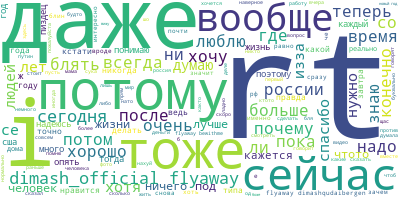

In [269]:
#word cloud: 
long_string = ','.join(list(prewar3['text'].values))
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

#### Remove Stop Words

In [16]:
adv.stopwords.keys()

dict_keys(['arabic', 'azerbaijani', 'bengali', 'catalan', 'chinese', 'croatian', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hindi', 'hungarian', 'indonesian', 'irish', 'italian', 'japanese', 'kazakh', 'nepali', 'norwegian', 'persian', 'polish', 'portuguese', 'romanian', 'russian', 'sinhala', 'spanish', 'swedish', 'tagalog', 'tamil', 'tatar', 'telugu', 'thai', 'turkish', 'ukrainian', 'urdu', 'vietnamese'])

In [160]:
print(sorted(adv.stopwords['russian'])[:50])

['а', 'будем', 'будет', 'будете', 'будешь', 'буду', 'будут', 'будучи', 'будь', 'будьте', 'бы', 'был', 'была', 'были', 'было', 'быть', 'в', 'вам', 'вами', 'вас', 'весь', 'во', 'вот', 'все', 'всего', 'всей', 'всем', 'всеми', 'всему', 'всех', 'всею', 'всея', 'всю', 'вся', 'всё', 'всём', 'вы', 'да', 'для', 'до', 'его', 'едим', 'едят', 'ее', 'ей', 'ел', 'ела', 'ем', 'ему', 'емъ']


In [161]:
print(sorted(adv.stopwords['ukrainian'])[:50])

['а', 'або', 'адже', 'але', 'алло', 'багато', 'без', 'безперервно', 'би', 'близько', 'був', 'буває', 'буде', 'будемо', 'будете', 'будеш', 'буду', 'будуть', 'будь', 'була', 'були', 'було', 'бути', 'бывь', 'більш', 'більше', 'біля', 'в', 'важлива', 'важливе', 'важливий', 'важливі', 'вам', 'вами', 'вас', 'ваш', 'ваша', 'ваше', 'ваші', 'вгору', 'вгорі', 'вдалині', 'вже', 'ви', 'вниз', 'внизу', 'вона', 'вони', 'воно', 'восьмий']


In [19]:
#Create  a list of stop words
stopwords_ru = list(adv.stopwords['russian'])
print(len(stopwords_ru))
stopwords_uk = list(adv.stopwords['ukrainian'])
print(len(stopwords_uk))
stopwords = stopwords_ru + stopwords_uk
print(len(stopwords))
stopwords.remove('прекрасно')
stopwords.remove('прекрасне')
print(len(stopwords))

264
391
655
653


In [20]:
#remove stop words
def remove_stopwords(df, stopwords):
    text_list = []
    for i in range(df.shape[0]):
        tweet = df['text'][i]
        text = tweet.split()
        text_filtered = [word for word in text if not word in stopwords]
        text = ' '.join(text_filtered)
        text_list.append(text)
    df['text'] = text_list
    return df

In [21]:
prewar4 = remove_stopwords(prewar3, stopwords)
postwar4 = remove_stopwords(postwar3, stopwords)
prewar4.head()

,timestamp,text,language
0,2021-11-24T00:59:59.000Z,ymidi23h блен скоро компанию,either
1,2021-11-24T00:59:59.000Z,волонтером модуль вишмату сотку,either
2,2021-11-24T00:59:58.000Z,rt tjforia баттер тусила первом месте биллборд...,russian
3,2021-11-24T00:59:58.000Z,кот прав httpstcoygipintveu,russian
4,2021-11-24T00:59:58.000Z,rt rgrus шриланка открыла выставку книг предме...,russian


In [22]:
print(prewar4['text'][1])

волонтером модуль вишмату сотку


### PRE-WAR WORD CLOUD

In [244]:
#separate out languages: 
prewar_russian = (prewar4.loc[prewar4['language'] == "russian"]).reset_index(drop=True)
postwar_russian = (postwar4.loc[postwar4['language'] == "russian"]).reset_index(drop=True)
prewar_ukrainian = (prewar4.loc[prewar4['language'] == "ukrainian"]).reset_index(drop=True)
postwar_ukrainian = (postwar4.loc[postwar4['language'] == "ukrainian"]).reset_index(drop=True)

PREWAR RUSSIAN


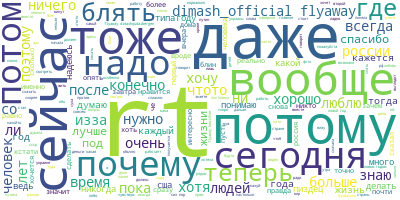

In [255]:
#Create a word cloud 
long_string = ','.join(list(prewar_russian['text'].values))
wordcloud1 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud1.generate(long_string)
print("PREWAR RUSSIAN")
wordcloud1.to_image()

In [328]:
print("      TOP 15 FREQUENT WORDS IN PREWAR TWEETS \n                    RUSSIAN")
top15 = pd.DataFrame(list(wordcloud1.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
top15['English Translation'] =  ['retweet or russia today', 'even', 'because', 'now', 'too', 
                                 'generally', 'today', 'necessary', 'why', 'after', 'now', 
                                 'fuck', 'where', 'dimash_official flyaway', 'more']

top15 = top15[['Tokens','English Translation', 'Frequency',]]
top15

      TOP 15 FREQUENT WORDS IN PREWAR TWEETS 
                    RUSSIAN


,Tokens,English Translation,Frequency
0,rt,retweet or russia today,1.000000
1,даже,even,0.220797
2,потому,because,0.215491
3,сейчас,now,0.195274
4,тоже,too,0.183398
5,вообще,generally,0.180365
6,сегодня,today,0.160907
7,надо,necessary,0.149662
8,почему,why,0.146630
9,потом,after,0.145492


PREWAR UKRAINE


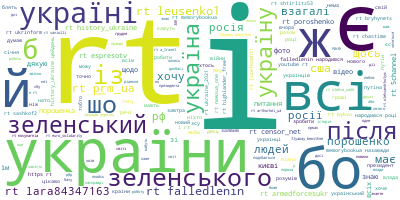

In [259]:
#Create a word cloud 
long_string = ','.join(list(prewar_ukrainian['text'].values))
wordcloud2 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud2.generate(long_string)
print("PREWAR UKRAINE")
wordcloud2.to_image()

In [325]:
print(" TOP 15 FREQUENT WORDS IN PREWAR TWEETS UKRAINIAN")
top15 = pd.DataFrame(list(wordcloud2.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
# print(list(top15['Tokens']))
top15['English Translation'] =  ['and', 'russia today or retweet', 'is', 'of Ukraine', 'for', 'Translation not found', 'all', 
                                 'and', 'Ukraine', 'Translation not found', 'from', 'Translation not found', 'Zelenskyy', 'after', 'Zelenskyy']

top15 = top15[['Tokens','English Translation', 'Frequency']]
top15

 TOP 15 FREQUENT WORDS IN PREWAR TWEETS UKRAINIAN


,Tokens,English Translation,Frequency
0,і,and,1.000000
1,rt,russia today or retweet,0.452156
2,є,is,0.132519
3,україни,of Ukraine,0.109569
4,бо,for,0.098279
5,ж,Translation not found,0.087914
6,всі,all,0.084768
7,й,and,0.080326
8,україні,Ukraine,0.076994
9,б,Translation not found,0.074218


### POST-WAR WORD CLOUD

POSTWAR RUSSIAN


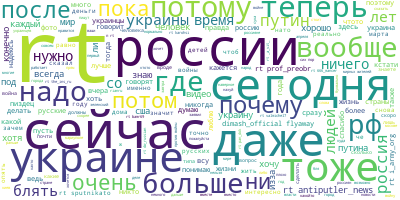

In [262]:
long_string = ','.join(list(postwar_russian['text'].values))
wordcloud3 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud3.generate(long_string)
print("POSTWAR RUSSIAN")
wordcloud3.to_image()

In [330]:
print("TOP 15 FREQUENT WORDS IN POSTWAR TWEETS \n               RUSSIAN")
top15 = pd.DataFrame(list(wordcloud3.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
# print(list(top15['Tokens']))
top15['English Translation'] =  ['rt', 'Russia', 'now', 'even', 'today', 'Ukraine', 'too', 'now',
                                 'because', 'where', 'more', 'generally', ' rf', 'must', 'why']

top15 = top15[['Tokens','English Translation', 'Frequency',]]
top15

TOP 15 FREQUENT WORDS IN POSTWAR TWEETS 
               RUSSIAN


,Tokens,English Translation,Frequency
0,rt,rt,1.000000
1,россии,Russia,0.207539
2,сейчас,now,0.206448
3,даже,even,0.172446
4,сегодня,today,0.150617
5,украине,Ukraine,0.133826
6,тоже,too,0.130384
7,теперь,now,0.128705
8,потому,because,0.128453
9,где,where,0.117790


POSTWAR UKRAINE


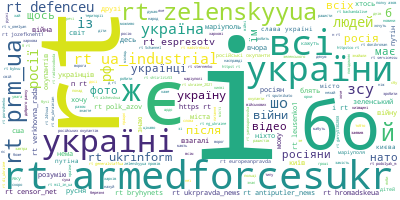

In [264]:
long_string = ','.join(list(postwar_ukrainian['text'].values))
wordcloud4 = WordCloud(background_color="white", contour_width=3, contour_color='steelblue')
wordcloud4.generate(long_string)
print("POSTWAR UKRAINE")
wordcloud4.to_image()

In [338]:
print("       TOP 15 FREQUENT WORDS IN POSTWAR TWEETS UKRAINIAN")
top15 = pd.DataFrame(list(wordcloud4.words_.items()), columns = ['Tokens', 'Frequency']).sort_values(by = "Frequency", ascending = False)[:15]
# print(list(top15['Tokens']))
top15['English Translation'] =  ['and', 'russia today or retweet', 'is', 'for', 'armedforcesukr', 'all', 'of Ukraine', 'Ukraine',
                                 'Translaiton not found', 'rt zelenskyy ua', 'rt prm_ua (News Channel in Ukraine)', ' and', 
                                 'Twitter account with news of war in Ukraine', 
                                 'Armed forces of Ukraine', 'Translaiton not found']
 
top15 = top15[['Tokens','English Translation', 'Frequency',]]
top15

       TOP 15 FREQUENT WORDS IN POSTWAR TWEETS UKRAINIAN


,Tokens,English Translation,Frequency
0,і,and,1.000000
1,rt,russia today or retweet,0.391470
2,є,is,0.139777
3,бо,for,0.102853
4,rt armedforcesukr,armedforcesukr,0.099227
5,всі,all,0.086251
6,україни,of Ukraine,0.081767
7,україні,Ukraine,0.081004
8,ж,Translaiton not found,0.076138
9,rt zelenskyyua,rt zelenskyy ua,0.074897


In [266]:
df5 = pd.merge(df1, df3, how="outer", on=["word"])
df5['absolute_difference'] = df5['prewar frequency'] - df5['postwar frequency']
df5['absolute_difference'] = df5.absolute_difference.abs()
df5 = df5.sort_values(by = "absolute_difference", ascending = False) 
df5[:15]

,word,prewar frequency,postwar frequency,absolute_difference
140,украине,0.034178,0.133826,0.099648
2,потому,0.215491,0.128453,0.087038
16,россии,0.123697,0.207539,0.083842
13,dimash_official flyaway,0.131404,0.057342,0.074062
95,рф,0.045044,0.112333,0.067289
5,вообще,0.180365,0.114600,0.065765
162,украины,0.030829,0.087650,0.056821
11,блять,0.142018,0.086307,0.055711
4,тоже,0.183398,0.130384,0.053014
17,хочу,0.121802,0.069180,0.052622


### LDA Analysis

#### Tokenizaiton

In [25]:
def tokenizaiton(df):
    tokenizer = RegexpTokenizer(r'\w+')
    text_list = []
    for i in range(df.shape[0]):
        tokens = tokenizer.tokenize(df['text'][i])
        text_list.append(tokens)
    return text_list

In [27]:
prewar_RU_tokens = tokenizaiton(prewar_russian)
postwar_RU_tokens = tokenizaiton(postwar_russian)
prewar_UK_tokens = tokenizaiton(prewar_ukrainian)
postwar_UK_tokens = tokenizaiton(postwar_ukrainian)

In [72]:
print(prewar_RU_tokens)
print(postwar_RU_tokens[1])
print(prewar_UK_tokens[1])
print(postwar_UK_tokens[1])

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



#### The language 'ukrainian' is not supported. Import Pre-defined class for stemming Ukraine
Source: https://github.com/Amice13/ukr_stemmer/blob/master/ukr_stemmer3.py

In [29]:
import re

class UkrainianStemmer():
    def __init__(self,word):
        self.word = word
        self.vowel = r'аеиоуюяіїє'  # http://uk.wikipedia.org/wiki/Голосний_звук
        self.perfectiveground = r'(ив|ивши|ившись|ыв|ывши|ывшись((?<=[ая])(в|вши|вшись)))$'
        # http://uk.wikipedia.org/wiki/Рефлексивне_дієслово
        self.reflexive = r'(с[яьи])$'
        # http://uk.wikipedia.org/wiki/Прикметник + http://wapedia.mobi/uk/Прикметник
        self.adjective = r'(ими|ій|ий|а|е|ова|ове|ів|є|їй|єє|еє|я|ім|ем|им|ім|их|іх|ою|йми|іми|у|ю|ого|ому|ої)$'
        # http://uk.wikipedia.org/wiki/Дієприкметник
        self.participle = r'(ий|ого|ому|им|ім|а|ій|у|ою|ій|і|их|йми|их)$'
        # http://uk.wikipedia.org/wiki/Дієслово
        self.verb = r'(сь|ся|ив|ать|ять|у|ю|ав|али|учи|ячи|вши|ши|е|ме|ати|яти|є)$'
        # http://uk.wikipedia.org/wiki/Іменник
        self.noun = r'(а|ев|ов|е|ями|ами|еи|и|ей|ой|ий|й|иям|ям|ием|ем|ам|ом|о|у|ах|иях|ях|ы|ь|ию|ью|ю|ия|ья|я|і|ові|ї|ею|єю|ою|є|еві|ем|єм|ів|їв|ю)$'
        self.rvre = r'[аеиоуюяіїє]'
        self.derivational = r'[^аеиоуюяіїє][аеиоуюяіїє]+[^аеиоуюяіїє]+[аеиоуюяіїє].*(?<=о)сть?$'
        self.RV = ''


    def ukstemmer_search_preprocess(self,word):
        word = word.lower()
        word = word.replace("'", "")
        word = word.replace("ё", "е")
        word = word.replace("ъ", "ї")
        return word

    def s(self,st, reg, to):
        orig = st
        self.RV = re.sub(reg, to, st)
        return (orig != self.RV)

    def stem_word(self):
        word = self.ukstemmer_search_preprocess(self.word)
        if not re.search('[аеиоуюяіїє]', word):
            stem = word
        else:
            p = re.search(self.rvre, word)
            start = word[0:p.span()[1]]
            self.RV = word[p.span()[1]:]

            # Step 1
            if not self.s(self.RV, self.perfectiveground, ''):

                self.s(self.RV, self.reflexive, '')
                if self.s(self.RV, self.adjective, ''):
                    self.s(self.RV, self.participle, '')
                else:
                    if not self.s(self.RV, self.verb, ''):
                        self.s(self.RV, self.noun, '')
            # Step 2
            self.s(self.RV, 'и$', '')

            # Step 3
            if re.search(self.derivational, self.RV):
                self.s(self.RV, 'ость$', '')

            # Step 4
            if self.s(self.RV, 'ь$', ''):
                self.s(self.RV, 'ейше?$', '')
                self.s(self.RV, 'нн$', u'н')

            stem = start + self.RV
        return stem

#### Stemming

In [30]:
def stemming_RU(tokenized_list): 
    stemmed_list = []
    for i in range(len(tokenized_list)):
        stemmer = SnowballStemmer("russian") 
        stemmed = []
        for j in range(len(tokenized_list[i])):
            stemmed.append(stemmer.stem(tokenized_list[i][j]))
        stemmed_list.append(stemmed)
    return stemmed_list

if __name__ == '__main__':
    def stemming_UK(tokenized_list): 
        stemmed_list = []
        for i in range(len(tokenized_list)): 
            stemmed = []
            for j in range(len(tokenized_list[i])):
                stemObj = UkrainianStemmer(tokenized_list[i][j])
                stemmed.append(stemObj.stem_word())
            stemmed_list.append(stemmed)
        return stemmed_list

In [31]:
stemmed_prewar_RU_tokens = stemming_RU(prewar_RU_tokens)
stemmed_postwar_RU_tokens = stemming_RU(postwar_RU_tokens)
stemmed_prewar_UK_tokens = stemming_UK(prewar_UK_tokens)
stemmed_postwar_UK_tokens = stemming_UK(postwar_UK_tokens)

In [84]:
len(stemmed_prewar_RU_tokens)

150369

In [99]:
def tokens_to_DF(tokens_lists): 
    df = pd.DataFrame()
    df['text'] = tokens_lists  
    return df 

In [137]:
prewar_RU_text = tokens_to_DF(stemmed_prewar_RU_tokens)
postwar_RU_text = tokens_to_DF(stemmed_postwar_RU_tokens)
prewar_UK_text = tokens_to_DF(stemmed_prewar_UK_tokens)
postwar_UK_text = tokens_to_DF(stemmed_postwar_UK_tokens)

#### Document Term Matrix

In [32]:
def document_term_matrix(text_list):   
    # Create Dictionary
    dictionary = corpora.Dictionary(text_list)
    #convert to bag of words
    corpus = [dictionary.doc2bow(text) for text in text_list]
    return corpus, dictionary

In [33]:
import warnings, logging
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s', level=logging.ERROR)

In [34]:
%time prewar_RU_corpus, prewar_RU_dictionary = document_term_matrix(stemmed_prewar_RU_tokens)
%time postwar_RU_corpus, postwar_RU_dictionary = document_term_matrix(stemmed_postwar_RU_tokens)
%time prewar_UK_corpus, prewar_UK_dictionary = document_term_matrix(stemmed_prewar_UK_tokens)
%time postwar_UK_corpus, postwar_UK_dictionary = document_term_matrix(stemmed_postwar_UK_tokens)

2022-05-08 22:26:17,117 | INFO | dictionary.py:201 | add_documents | adding document #0 to Dictionary<0 unique tokens: []>
2022-05-08 22:26:17,487 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<31405 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-08 22:26:17,880 | INFO | dictionary.py:201 | add_documents | adding document #20000 to Dictionary<50391 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-08 22:26:18,258 | INFO | dictionary.py:201 | add_documents | adding document #30000 to Dictionary<66539 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-08 22:26:18,604 | INFO | dictionary.py:201 | add_documents | adding document #40000 to Dictionary<81315 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']...>
2022-05-08 22:26:18,956 | INFO | dictionary.py:201 | add_documents | adding document #50000 to Dictionary<94669 unique tokens: ['rt', 'tjforia', 'б', 'баттер', 'биллборд']..

CPU times: user 7.73 s, sys: 297 ms, total: 8.03 s
Wall time: 9.02 s


2022-05-08 22:26:26,521 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<25795 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-08 22:26:26,850 | INFO | dictionary.py:201 | add_documents | adding document #20000 to Dictionary<41789 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-08 22:26:27,209 | INFO | dictionary.py:201 | add_documents | adding document #30000 to Dictionary<56024 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-08 22:26:27,593 | INFO | dictionary.py:201 | add_documents | adding document #40000 to Dictionary<69143 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-08 22:26:27,964 | INFO | dictionary.py:201 | add_documents | adding document #50000 to Dictionary<80434 unique tokens: ['httpstcotmqmcahni2', 'бык', 'виагр', 'дмитр', 'дмитрийбык']...>
2022-05-08 22:26:28,353 | INFO | di

CPU times: user 5.03 s, sys: 179 ms, total: 5.21 s
Wall time: 5.74 s


2022-05-08 22:26:32,297 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<31213 unique tokens: ['dimashqudaibergеn', 'flyaw', 'lara84347163', 'rt', 'бог']...>
2022-05-08 22:26:32,580 | INFO | dictionary.py:206 | add_documents | built Dictionary<48048 unique tokens: ['dimashqudaibergеn', 'flyaw', 'lara84347163', 'rt', 'бог']...> from 19088 documents (total 228086 corpus positions)
2022-05-08 22:26:32,582 | INFO | utils.py:448 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary<48048 unique tokens: ['dimashqudaibergеn', 'flyaw', 'lara84347163', 'rt', 'бог']...> from 19088 documents (total 228086 corpus positions)", 'datetime': '2022-05-08T22:26:32.582022', 'gensim': '4.2.0', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2022-05-08 22:26:32,909 | INFO | dictionary.py:201 | add_documents | adding document #0 to Dictionary<0 unique tokens: []>


CPU times: user 874 ms, sys: 34.5 ms, total: 908 ms
Wall time: 988 ms


2022-05-08 22:26:33,252 | INFO | dictionary.py:201 | add_documents | adding document #10000 to Dictionary<24247 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-08 22:26:33,591 | INFO | dictionary.py:201 | add_documents | adding document #20000 to Dictionary<39846 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-08 22:26:33,952 | INFO | dictionary.py:201 | add_documents | adding document #30000 to Dictionary<53368 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-08 22:26:34,396 | INFO | dictionary.py:201 | add_documents | adding document #40000 to Dictionary<65881 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...>
2022-05-08 22:26:34,589 | INFO | dictionary.py:206 | add_documents | built Dictionary<72796 unique tokens: ['а', 'арм', 'вайн', 'вийшл', 'війн']...> from 45536 documents (total 566142 corpus positions)
2022-05-08 22:26:34,591 | INFO | utils.py:448 | add_lifecycle_event | Dictionary lifecycle event {'msg': "built Dictionary

CPU times: user 2.24 s, sys: 82.3 ms, total: 2.32 s
Wall time: 2.62 s


In [134]:
print(prewar_RU_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1)]


In [117]:
#How to interpret the above corpus and dictionaries: 
[[(prewar_RU_dictionary[i], freq) for i, freq in doc] for doc in prewar_RU_corpus[:1]]

[[('rt', 1),
  ('tjforia', 1),
  ('б', 1),
  ('баттер', 1),
  ('биллборд', 1),
  ('год', 1),
  ('дава', 1),
  ('мест', 1),
  ('номинирова', 1),
  ('перв', 1),
  ('песн', 2),
  ('проб', 1),
  ('туд', 1),
  ('тус', 1)]]

### Build Model

In [36]:
corpus = [prewar_RU_corpus, postwar_RU_corpus, prewar_UK_corpus, postwar_UK_corpus]
dictionaries = [prewar_RU_dictionary, postwar_RU_dictionary, prewar_UK_dictionary, postwar_UK_dictionary]

#### prewar_RU_lda

In [44]:
prewar_RU_lda = models.ldamodel.LdaModel(corpus=prewar_RU_corpus, id2word=prewar_RU_dictionary, num_topics=20)

2022-05-08 22:41:44,308 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-08 22:41:44,310 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-08 22:41:44,368 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-08 22:41:44,785 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 150369 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-08 22:41:44,789 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/150369
2022-05-08 22:41:45,977 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 150369 documents
2022-05-08 22:41:46,158 | INFO | ldamodel.py:1196 | show_topics | topic #13 (0.050): 0.029*"rt" + 0.005*"больш" + 0.004*"человек" + 0.004*"вмест" + 0.004*"посл" + 

#### postwar_RU_lda

In [45]:
postwar_RU_lda = models.ldamodel.LdaModel(corpus=postwar_RU_corpus,id2word=postwar_RU_dictionary,num_topics=20)

2022-05-08 22:51:39,906 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-08 22:51:39,907 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-08 22:51:39,945 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-08 22:51:40,211 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 97844 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-08 22:51:40,226 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/97844
2022-05-08 22:51:41,478 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 97844 documents
2022-05-08 22:51:43,111 | INFO | ldamodel.py:1196 | show_topics | topic #19 (0.050): 0.055*"rt" + 0.019*"украин" + 0.007*"войн" + 0.007*"путин" + 0.006*"нужн" + 0.005

#### prewar_UK_lda

In [46]:
prewar_UK_lda = models.ldamodel.LdaModel(corpus=prewar_UK_corpus,id2word=prewar_UK_dictionary,num_topics=20)

2022-05-08 22:53:08,743 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-08 22:53:08,745 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-08 22:53:08,759 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-08 22:53:08,893 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 19088 documents, updating model once every 2000 documents, evaluating perplexity every 19088 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-08 22:53:08,894 | WARNING | ldamodel.py:958 | update | too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-08 22:53:08,911 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/19088
2022-05-08 22:53:10,256 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model o

#### postwar_UK_lda

In [47]:
postwar_UK_lda = models.ldamodel.LdaModel(corpus=postwar_UK_corpus,id2word=postwar_UK_dictionary,num_topics=20)

2022-05-08 23:00:34,262 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric alpha at 0.05
2022-05-08 23:00:34,270 | INFO | ldamodel.py:576 | init_dir_prior | using symmetric eta at 0.05
2022-05-08 23:00:34,297 | INFO | ldamodel.py:481 | __init__ | using serial LDA version on this node
2022-05-08 23:00:34,483 | INFO | ldamodel.py:947 | update | running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 45536 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-08 23:00:34,505 | INFO | ldamodel.py:1001 | update | PROGRESS: pass 0, at document #2000/45536
2022-05-08 23:00:35,614 | INFO | ldamodel.py:233 | blend | merging changes from 2000 documents into a model of 45536 documents
2022-05-08 23:00:36,111 | INFO | ldamodel.py:1196 | show_topics | topic #4 (0.050): 0.053*"rt" + 0.015*"і" + 0.012*"україн" + 0.010*"українськ" + 0.006*"бо" + 0.006*"

### Model Analysis

In [347]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=prewar_RU_lda, corpus=prewar_RU_corpus, dictionary = prewar_RU_dictionary, coherence='u_mass')
coherence_lda_PR_RU = coherence_model_lda.get_coherence()

coherence_model_lda = CoherenceModel(model=postwar_RU_lda, corpus=postwar_RU_corpus, dictionary =  postwar_RU_dictionary, coherence='u_mass')
coherence_lda_PO_RU = coherence_model_lda.get_coherence()

coherence_model_lda = CoherenceModel(model=prewar_UK_lda, corpus=prewar_UK_corpus, dictionary = prewar_UK_dictionary, coherence='u_mass')
coherence_lda_PR_UK = coherence_model_lda.get_coherence()

coherence_model_lda = CoherenceModel(model=postwar_UK_lda, corpus=postwar_UK_corpus, dictionary = postwar_UK_dictionary, coherence='u_mass')
coherence_lda_PO_UK = coherence_model_lda.get_coherence()

2022-05-10 07:26:08,728 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 1000 documents
2022-05-10 07:26:08,734 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 2000 documents
2022-05-10 07:26:08,745 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 3000 documents
2022-05-10 07:26:08,758 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 4000 documents
2022-05-10 07:26:08,780 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 5000 documents
2022-05-10 07:26:08,795 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 6000 documents
2022-05-10 07:26:08,805 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 7000 documents
2022-05-10 07:26:08,817 | INFO | text_analysis.py:121 | num_docs | CorpusAccumulator accumulated stats from 8000 documents
2022-05-10 07:26

In [349]:
print('PW_RU Coherence Score: ', coherence_lda_PW_RU)
print('PO_RU Coherence Score: ', coherence_lda_PO_RU)
print('PW_UK Coherence Score: ', coherence_lda_PR_UK)
print('PO_UK Coherence Score: ', coherence_lda_PO_UK)

PW_RU Coherence Score:  -6.653168176897227
PO_RU Coherence Score:  -7.146612449822972
PW_UK Coherence Score:  -10.835313864835268
PO_UK Coherence Score:  -8.218857503108106


In [445]:
# print("\n                                                    POST WAR RUSSIA")
# postwar_RU_topics = {'Topic_' + str(i): [token for token, score in postwar_RU_lda.show_topic(i, topn=15)] for i in range(0, postwar_RU_lda.num_topics)}
# topics = [list(postwar_RU_topics["Topic_3"]), list(postwar_RU_topics["Topic_4"]), list(postwar_RU_topics["Topic_5"])]
# RU_postwar = pd.DataFrame(topics).T
# RU_postwar.columns = ["Top Words: Topic 3","Top Words: Topic 4", "Top Words: Topic 5"]

# english_3 = ['fuck', 'deeds', 'happy', 'correct', 'rt', 'telling', 'bitch', 'nah', 'zab', 'done', 
#            'beginning', 'druz', 'too ', 'problems', 'found']

# english_4 = ['Russian', 'rt', 'kill', 'kill', 'arm', 'Ukrainian', 'girls', 'land', 'ship',
#              'world', 'fascist', 'death', 'duty ', 'Putin', 'Kherson']

# english_5 = ['rt', 'ukrain', 'putin', 'war', 'ross', 'victories', 'people', 'last', 'court',
#              'countries', 'rossiysk', 'weapons', 'bombs', 'world', 'beginning']

# RU_postwar['English Translation: Topic 3'] = english_3 
# RU_postwar['English Translation: Topic 4'] = english_4 
# RU_postwar['English Translation: Topic 5'] = english_5 
# RU_postwar = RU_postwar[["Top Words: Topic 3",'English Translation: Topic 3', "Top Words: Topic 4", 
#                        'English Translation: Topic 4', "Top Words: Topic 5", 'English Translation: Topic 5',]]
# RU_postwar


print("\n                                                    POST WAR UKRAINE")
postwar_UK_topics = {'Topic_' + str(i): [token for token, score in postwar_UK_lda.show_topic(i, topn=20)] for i in range(0, postwar_UK_lda.num_topics)}      
topics = [list(postwar_UK_topics["Topic_1"]), list(postwar_UK_topics["Topic_3"]), list(postwar_UK_topics["Topic_4"])]
UK_postwar = pd.DataFrame(topics).T
UK_postwar.columns = ["Top Words: Topic 1","Top Words: Topic 3", "Top Words: Topic 4"]

english_1 =['rt', 'ukraine', 'i', 'zelensk', 'president', 'zelenskyyua', 'usa', 'ma', 'rosi', 'support', 
            'wars', 'poland', 'rad','people',' ros', 'un', 'rights', 'russian', 'news', 'Vladimir']


english_4 = ['rt', 'and', 'though', 'because', 'friend', 'gentleman', 'moscow', 'time', 'knows',
             ' guy ',' good ',' does', 'moment ',' night ',' live ',' tweet ',' incredible '
             ,' all ',' reminder ',' bear ']

english_3 = ['languages', 'rt', 'Crimea', 'dum', 'full', 'histories',' children ',
             ' rosn ',' waters', 'zavd', 'ok', 'davait', 'sprav' , 'questions',
             'main', 'actually', 'Ukrainian', '40', 'cat', 'deputy']

UK_postwar['English Translation: Topic 1'] = english_1
UK_postwar['English Translation: Topic 3'] = english_3 
UK_postwar['English Translation: Topic 4'] = english_4 
UK_postwar = UK_postwar[["Top Words: Topic 1",'English Translation: Topic 1', "Top Words: Topic 3", 
                       'English Translation: Topic 3', "Top Words: Topic 4", 'English Translation: Topic 4',]]
UK_postwar


                                                    POST WAR UKRAINE


,Top Words: Topic 1,English Translation: Topic 1,Top Words: Topic 3,English Translation: Topic 3,Top Words: Topic 4,English Translation: Topic 4
0,rt,rt,мов,languages,rt,rt
1,україн,ukraine,rt,rt,і,and
2,і,i,крим,Crimea,хоч,though
3,зеленськ,zelensk,дум,dum,бо,because
4,президент,president,повн,full,друг,friend
5,zelenskyyua,zelenskyyua,істор,histories,пан,gentleman
6,сша,usa,дитин,children,москв,moscow
7,ма,ma,росн,rosn,час,time
8,росі,rosi,вод,waters,зна,knows
9,підтримк,support,завд,zavd,хлопц,guy


In [142]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
prewar_RU_visual = pyLDAvis.gensim_models.prepare(prewar_RU_lda, prewar_RU_corpus, prewar_RU_dictionary)
prewar_RU_visual

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.271549 -0.074222       1        1  12.223751
17     0.022817 -0.168566       2        1   6.786232
16    -0.011248 -0.051998       3        1   5.859096
8     -0.191809  0.034386       4        1   5.809093
4      0.079996 -0.250832       5        1   5.660486
5     -0.101584 -0.060582       6        1   5.448757
18    -0.146566  0.096513       7        1   5.326031
1     -0.144392  0.034346       8        1   5.231956
12     0.087896 -0.097247       9        1   5.196876
2     -0.047899  0.011593      10        1   5.160828
3      0.118891 -0.018952      11        1   4.616714
14     0.124000 -0.003566      12        1   4.149294
15    -0.037712  0.085512      13        1   4.008619
9      0.072271 -0.006354      14        1   3.878885
10     0.032353  0.028256      15        1   3.875605
11     0.070460  0.011474      16        1   3.743733
6      0.086601  0.066876      17        1   3.563071
13     0.094632  0.079001      18        1   3.299345
19     0.075740  0.137106      19        1   3.092213
0      0.087100  0.147256      20        1   3.069414, topic_info=                 Term          Freq         Total Category  logprob  loglift
407   dimash_official   8443.000000   8443.000000  Default  30.0000  30.0000
5                 год   7520.000000   7520.000000  Default  29.0000  29.0000
0                  rt  73530.000000  73530.000000  Default  28.0000  28.0000
408           flyaway   6469.000000   6469.000000  Default  27.0000  27.0000
382               нов   6446.000000   6446.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
205           смотрет    675.810670   1003.146254  Topic20  -4.3870   3.0887
5977         украинск    529.706319    734.756643  Topic20  -4.6305   3.1565
2096            смотр    922.099717   2070.133948  Topic20  -4.0762   2.6750
3064         настроен    407.122553    825.835405  Topic20  -4.8938   2.7764
0                  rt    460.265900  73530.024517  Topic20  -4.7711  -1.5900

[963 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
541       1  0.000604      1
541       2  0.003625      1
541       3  0.871110      1
541       5  0.000604      1
541       9  0.059806      1
...     ...       ...    ...
1810     15  0.032733   явля
2173     11  0.998668   язык
6172      5  0.997494  январ
1678     15  0.994441    ярк
3591     19  0.992267     яэ

[2274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 18, 17, 9, 5, 6, 19, 2, 13, 3, 4, 15, 16, 10, 11, 12, 7, 14, 20, 1])

In [141]:
pyLDAvis.enable_notebook()
postwar_RU_visual = pyLDAvis.gensim_models.prepare(postwar_RU_lda, postwar_RU_corpus, postwar_RU_dictionary)
postwar_RU_visual

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.150520 -0.232990       1        1  9.535967
8      0.128239 -0.232032       2        1  8.663485
5     -0.189995 -0.083680       3        1  7.441146
12    -0.190718 -0.046317       4        1  7.061925
16    -0.122346 -0.047076       5        1  6.896515
13    -0.150552 -0.056012       6        1  6.437578
1      0.064569 -0.089999       7        1  5.670045
4     -0.055755  0.004619       8        1  4.467973
10     0.070043 -0.068582       9        1  4.423055
9     -0.109090  0.027670      10        1  4.402822
17    -0.112627  0.036355      11        1  4.064237
15    -0.054787  0.066607      12        1  3.743772
2      0.060833  0.058323      13        1  3.565930
14     0.106355  0.057667      14        1  3.555074
3      0.144060  0.028979      15        1  3.529181
19    -0.018986  0.090199      16        1  3.523997
7      0.125337  0.148677      17        1  3.331083
6      0.065980  0.079244      18        1  3.275811
11     0.058392  0.130687      19        1  3.259041
18     0.030529  0.127664      20        1  3.151366, topic_info=                 Term          Freq         Total Category  logprob  loglift
214             русск   3855.000000   3855.000000  Default  30.0000  30.0000
5492  dimash_official   3187.000000   3187.000000  Default  29.0000  29.0000
35                 rt  74039.000000  74039.000000  Default  28.0000  28.0000
55              путин   5481.000000   5481.000000  Default  27.0000  27.0000
57             украин   9137.000000   9137.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
1155          родител    407.124074    452.997000  Topic20  -4.5630   3.3506
4566               эх    288.199717    319.786947  Topic20  -4.9084   3.3533
1160           област    705.853373   1580.884505  Topic20  -4.0127   2.6510
35                 rt   1440.346724  74039.836865  Topic20  -3.2995  -0.4824
50                зач    331.817943    831.281812  Topic20  -4.7675   2.5390

[1058 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
866       1  0.000756      1
866       2  0.000756      1
866       3  0.047647      1
866       6  0.275292      1
866       7  0.142940      1
...     ...       ...    ...
1383      8  0.001887  ядерн
2194      1  0.315724   язык
2194     13  0.681800   язык
3546      6  0.996589   япон
8380      2  0.992919    ярк

[2796 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 6, 13, 17, 14, 2, 5, 11, 10, 18, 16, 3, 15, 4, 20, 8, 7, 12, 19])

In [394]:
prewar_UK_visual = pyLDAvis.gensim_models.prepare(prewar_UK_lda, prewar_UK_corpus, prewar_UK_dictionary)
prewar_UK_visual

/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.241564  0.023849       1        1  13.335606
13     0.043391 -0.180684       2        1   7.744073
16     0.160729  0.045877       3        1   7.325082
10     0.113815  0.046689       4        1   6.756020
18     0.003030 -0.155191       5        1   5.611978
9      0.036100  0.082693       6        1   5.307645
3      0.015639 -0.104625       7        1   5.112251
12     0.094900  0.008548       8        1   4.979388
14     0.019212 -0.009812       9        1   4.673793
15    -0.042891 -0.139584      10        1   4.526297
11     0.015772  0.081460      11        1   4.116962
8     -0.073302  0.022695      12        1   4.017926
7     -0.037834 -0.057965      13        1   3.997563
6     -0.029163  0.073933      14        1   3.704570
5     -0.056844  0.055330      15        1   3.599280
19    -0.020973  0.119468      16        1   3.557729
2     -0.079205 -0.025522      17        1   3.427235
1     -0.076428  0.048803      18        1   3.308045
4     -0.137782  0.033771      19        1   2.668241
0     -0.189731  0.030268      20        1   2.230315, topic_info=        Term         Freq         Total Category  logprob  loglift
217   україн  3412.000000   3412.000000  Default  30.0000  30.0000
14         і  6947.000000   6947.000000  Default  29.0000  29.0000
1944    збро   309.000000    309.000000  Default  28.0000  28.0000
1272   народ   565.000000    565.000000  Default  27.0000  27.0000
1324     лют   257.000000    257.000000  Default  26.0000  26.0000
...      ...          ...           ...      ...      ...      ...
2222   батьк    36.764239    107.427470  Topic20  -4.9299   2.7307
1917   бачил    32.274000     77.277506  Topic20  -5.0602   2.9299
1196     зна    43.830641    310.976763  Topic20  -4.7541   1.8436
119       їм    30.825250    170.428405  Topic20  -5.1061   2.0930
3         rt    46.551581  13531.116949  Topic20  -4.6939  -1.8692

[1183 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
223       6  0.941840     000
223       8  0.039796     000
1293      1  0.275330      10
1293      2  0.162374      10
1293      8  0.007060      10
...     ...       ...     ...
4184      7  0.015192     їхн
4184     20  0.957101     їхн
7950      9  0.965027    やまぴー
7952      9  0.981835  山pℓσνє
7953      9  0.981783    山下智久

[3013 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 14, 17, 11, 19, 10, 4, 13, 15, 16, 12, 9, 8, 7, 6, 20, 3, 2, 5, 1])

In [147]:
postwar_UK_visual = pyLDAvis.gensim_models.prepare(postwar_UK_lda, postwar_UK_corpus, postwar_UK_dictionary)
postwar_UK_visual

/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/khevnaparikh/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
1     -0.150893 -0.050964       1        1  9.801220
9      0.003309 -0.218033       2        1  8.579543
15    -0.178923  0.097079       3        1  7.187911
11    -0.163144  0.006854       4        1  7.002433
10    -0.141720  0.049022       5        1  6.252085
17     0.042371 -0.187170       6        1  5.723349
5     -0.107917  0.040734       7        1  5.258332
13     0.030966 -0.101593       8        1  5.224244
16    -0.095316 -0.003437       9        1  5.150803
19     0.013698 -0.060856      10        1  4.690510
4      0.042784 -0.092182      11        1  4.506495
12     0.054305 -0.065574      12        1  4.080472
6     -0.020669  0.084041      13        1  3.924715
14    -0.000786  0.062972      14        1  3.686849
8      0.123944 -0.032148      15        1  3.610064
7      0.083949  0.025990      16        1  3.216914
0      0.023147  0.159756      17        1  3.123201
18     0.150378  0.054924      18        1  3.084809
2      0.155796  0.119427      19        1  2.989337
3      0.134722  0.111158      20        1  2.906717, topic_info=           Term          Freq         Total Category  logprob  loglift
48       україн   7865.000000   7865.000000  Default  30.0000  30.0000
25            і  15457.000000  15457.000000  Default  29.0000  29.0000
201     окупант   2297.000000   2297.000000  Default  28.0000  28.0000
2755   маріупол   2536.000000   2536.000000  Default  27.0000  27.0000
204    російськ   3963.000000   3963.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
377        різн    159.114795    263.442426  Topic20  -4.6388   3.0339
1701     питанн    206.386717    499.662461  Topic20  -4.3787   2.6540
979        дивл    134.195690    182.867866  Topic20  -4.8092   3.2287
28           rt    477.213379  43814.899954  Topic20  -3.5405  -0.9816
24    українськ    189.955077   2754.880893  Topic20  -4.4617   0.8638

[1138 rows x 6 columns], token_table=      Topic      Freq Term
term                      
3288     20  0.991364  000
2039      1  0.020358    1
2039      2  0.128508    1
2039      3  0.034354    1
2039      5  0.002545    1
...     ...       ...  ...
1182      4  0.004821  їхн
1182      5  0.130176  їхн
1182      6  0.149462  їхн
1182     12  0.388118  їхн
1182     14  0.026517  їхн

[2804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 10, 16, 12, 11, 18, 6, 14, 17, 20, 5, 13, 7, 15, 9, 8, 1, 19, 3, 4])